### Will a Customer Accept the Coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**


This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)

3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head(10)

destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   
5  No Urgent Place  Friend(s)   Sunny           80   6PM   
6  No Urgent Place  Friend(s)   Sunny           55   2PM   
7  No Urgent Place     Kid(s)   Sunny           80  10AM   
8  No Urgent Place     Kid(s)   Sunny           80  10AM   
9  No Urgent Place     Kid(s)   Sunny           80  10AM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   
5        Restaurant(<20)         2h  Female  21  Unmarried partner  ...   
6  Carry out & Take away         1d  Female  21  Unmarried partner  ...   
7        Restaurant(<20)         2h  Female  21  Unmarried partner  ...   
8  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
9                    Bar         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8              1~3   
1        never       NaN                  4~8              1~3   
2        never       NaN                  4~8              1~3   
3        never       NaN                  4~8              1~3   
4        never       NaN                  4~8              1~3   
5        never       NaN                  4~8              1~3   
6        never       NaN                  4~8              1~3   
7        never       NaN                  4~8              1~3   
8        never       NaN                  4~8              1~3   
9        never       NaN                  4~8              1~3   

  toCoupon_GEQ5min toCoupon_GEQ15min toCoupon_GEQ25min direction_same  \
0                1                 0                 0              0   
1                1                 0                 0              0   
2                1                 1                 0              0   
3                1                 1                 0              0   
4                1                 1                 0              0   
5                1                 1                 0              0   
6                1                 1                 0              0   
7                1                 1                 0              0   
8                1                 1                 0              0   
9                1                 1                 0              0   

  direction_opp  Y  
0             1  1  
1             1  0  
2             1  1  
3             1  0  
4             1  0  
5             1  1  
6             1  1  
7             1  1  
8             1  1  
9             1  0  

[10 rows x 26 columns]

In [4]:
data.iloc[0:3]

destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8              1~3   
1        never       NaN                  4~8              1~3   
2        never       NaN                  4~8              1~3   

  toCoupon_GEQ5min toCoupon_GEQ15min toCoupon_GEQ25min direction_same  \
0                1                 0                 0              0   
1                1                 0                 0              0   
2                1                 1                 0              0   

  direction_opp  Y  
0             1  1  
1             1  0  
2             1  1  

[3 rows x 26 columns]

In [5]:
data.describe()

temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
count  12684.000000  12684.000000           12684.0       12684.000000   
mean      63.301798      0.414144               1.0           0.561495   
std       19.154486      0.492593               0.0           0.496224   
min       30.000000      0.000000               1.0           0.000000   
25%       55.000000      0.000000               1.0           0.000000   
50%       80.000000      0.000000               1.0           1.000000   
75%       80.000000      1.000000               1.0           1.000000   
max       80.000000      1.000000               1.0           1.000000   

       toCoupon_GEQ25min  direction_same  direction_opp             Y  
count       12684.000000    12684.000000   12684.000000  12684.000000  
mean            0.119126        0.214759       0.785241      0.568433  
std             0.323950        0.410671       0.410671      0.495314  
min             0.000000        0.000000       0.000000      0.000000  
25%             0.000000        0.000000       1.000000      0.000000  
50%             0.000000        0.000000       1.000000      1.000000  
75%             0.000000        0.000000       1.000000      1.000000  
max             1.000000        1.000000       1.000000      1.000000

In [6]:
data.value_counts('Y')

Y
1    7210
0    5474
dtype: int64

In [465]:
data["time"] = data["time"].replace(["6PM","7AM","10AM","2PM","10PM"],[1800,700,1000,1400,2200])
#data["coupon"] = data["coupon"].replace(["6PM","7AM","10AM","2PM","10PM"],["1800","700","1000","1400","2200"])
data["expiration"] = data["expiration"].replace("1d","24h")
#data["age"] = data["age"].replace(["6PM","7AM","10AM","2PM","10PM"],["1800","700","1000","1400","2200"])
data["maritalStatus"] = data["maritalStatus"].replace(["Married partner","Unmarried partner"],["Married","Dating"])
data["education"] = data["education"].replace(["Some college - no degree","Some High School","Graduate degree (Masters or Doctorate)","High School Graduate"],["GED","Dropout","Graduate degree","GED"])
data["income"] = data["income"].replace(["Less than $12500","$12500 - $24999","$25000 - $37499","$37500 - $49999","$50000 - $62499","$62500 - $74999","$75000 - $87499","$87500 - $99999","$100000 or More"],
                                        [1,2,3,4,5,6,7,8,9])
data["Bar"] = data["Bar"].replace(["never","less1","gt8"],["0","<1",">8"])
data["CoffeeHouse"] = data["CoffeeHouse"].replace(["never","less1","gt8"],["0","<1",">8"])
data["CarryAway"] = data["CarryAway"].replace(["never","less1","gt8"],["0","<1",">8"])
data["RestaurantLessThan20"] = data["RestaurantLessThan20"].replace(["never","less1","gt8"],["0","<1",">8"])
data["Restaurant20To50"] = data["Restaurant20To50"].replace(["never","less1","gt8"],["0","<1",">8"])


In [466]:
data.sample(5)

destination  passanger weather  temperature  time  \
12640  No Urgent Place     Kid(s)   Sunny           30  2200   
5863              Home      Alone   Sunny           80  1800   
4315              Home      Alone   Sunny           80  1800   
2443              Home      Alone   Sunny           55  1800   
11014  No Urgent Place  Friend(s)   Sunny           80  1800   

                  coupon expiration  gender age maritalStatus  ...  \
12640  Restaurant(20-50)         2h    Male  31       Married  ...   
5863        Coffee House        24h  Female  26       Married  ...   
4315     Restaurant(<20)         2h  Female  46        Single  ...   
2443                 Bar        24h  Female  21        Dating  ...   
11014    Restaurant(<20)         2h  Female  26        Single  ...   

       CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
12640            0       4~8                   >8               <1   
5863            <1        <1                   >8               <1   
4315             0       4~8                  1~3              1~3   
2443            >8        >8                  1~3               <1   
11014            0       1~3                  4~8              1~3   

      toCoupon_GEQ5min toCoupon_GEQ15min toCoupon_GEQ25min direction_same  \
12640                1                 0                 0              0   
5863                 1                 0                 0              0   
4315                 1                 0                 0              1   
2443                 1                 0                 0              1   
11014                1                 0                 0              0   

      direction_opp  Y  
12640             1  0  
5863              1  0  
4315              0  1  
2443              0  1  
11014             1  1  

[5 rows x 26 columns]

2. Investigate the dataset for missing or problematic data.

In [467]:
#looked at data 

3. Decide what to do about your missing data -- drop, replace, other...

In [468]:
#Decided to replace,drop values above.
#Decided to rate income by Levels
#Turn time into Military Time
#Coupon Expiration to 1d to 24 hours
#merged some similarties in selection

4. What proportion of the total observations chose to accept the coupon? 



In [469]:
#Y value = Coupon Acceptance 
# 1 = Yes 0 = No
data.value_counts('Y')

Y
1    7210
0    5474
dtype: int64

In [470]:
fig = px.pie(data,names='Y', title = 'Coupon Acceptance Rate',hole= .5,color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()
# Yes = 56.8%
# No = 43.2%

5. Use a bar plot to visualize the `coupon` column.

In [471]:
fig1 = px.bar(data, x="coupon", title= 'Coupon Used')
fig1.show()

6. Use a histogram to visualize the temperature column.

<AxesSubplot:xlabel='temperature', ylabel='Count'>

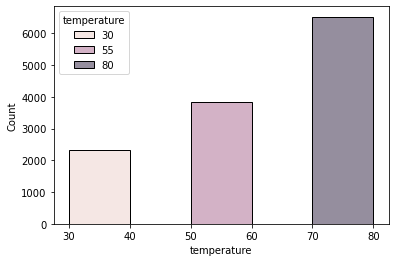

In [472]:
sns.histplot(data=data, x='temperature',bins = 5,hue='temperature')

<AxesSubplot:xlabel='temperature', ylabel='Count'>

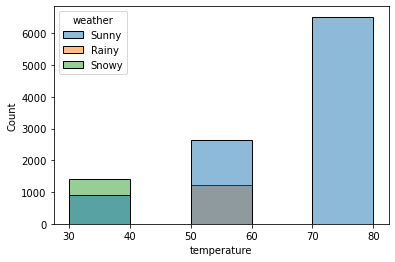

In [473]:
sns.histplot(data=data, x='temperature',color = 'red',bins = 5,hue='weather')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [474]:
new_df = data.filter(['Bar'],axis=1)
new_df.value_counts('Bar')

Bar
0      5197
<1     3482
1~3    2473
4~8    1076
>8      349
dtype: int64

2. What proportion of bar coupons were accepted?


In [475]:
new_df["Bar"] = new_df["Bar"].replace(["0","<1","1~3","4~8",">8"],["No","Yes","Yes","Yes","Yes"])

In [476]:
new_df.value_counts('Bar')

Bar
Yes    7380
No     5197
dtype: int64

In [477]:
fig2 = px.pie(new_df,names='Bar', title = 'Bar Coupon Acceptance Rate',hole= .5,color_discrete_sequence= px.colors.qualitative.Set3)
fig2.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [478]:
new_df1 = data.filter(['Bar',"Y"],axis=1)
new_df1.head()

Bar  Y
0   0  1
1   0  0
2   0  1
3   0  0
4   0  0

In [479]:
new_df1["Bar"] = new_df1["Bar"].replace(["0","<1","1~3","4~8",">8"],["3 or Less","3 or Less","3 or Less","More than 3","More than 3"])

In [480]:
new_df1.value_counts('Bar')

Bar
3 or Less      11152
More than 3     1425
dtype: int64

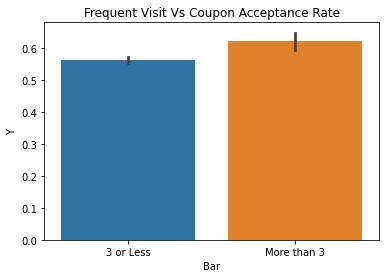

In [481]:
fig3 = sns.barplot(data = new_df1, x = 'Bar', y = 'Y').set(title = 'Frequent Visit Vs Coupon Acceptance Rate')
#Customers are more likely to accept coupon if they go there more than 3 times a month.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [482]:
new_df2 = data.filter(['Y','age','Bar','passanger','occupation','maritalStatus'],axis=1)
new_df2.head()

Y age Bar  passanger  occupation maritalStatus
0  1  21   0      Alone  Unemployed        Dating
1  0  21   0  Friend(s)  Unemployed        Dating
2  1  21   0  Friend(s)  Unemployed        Dating
3  0  21   0  Friend(s)  Unemployed        Dating
4  0  21   0  Friend(s)  Unemployed        Dating

In [483]:
new_df2.value_counts('age')

age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
dtype: int64

In [484]:
new_df2.value_counts('Bar')

Bar
0      5197
<1     3482
1~3    2473
4~8    1076
>8      349
dtype: int64

In [485]:
new_df2["age"] = new_df2["age"].replace(["21","26","31","50plus","36","41","46","below21"],
                                        ["Below 25","Above 25","Above 25","Above 25","Above 25","Above 25","Above 25","Below 25"])
new_df2["Bar"] = new_df2["Bar"].replace(["0","<1","1~3","4~8",">8"],["0","0","1","1","1"])

In [486]:
new_df2.sample(5)

Y       age Bar  passanger                                occupation  \
4643   0  Above 25   0      Alone                           Sales & Related   
12538  1  Below 25   1      Alone        Food Preparation & Serving Related   
5526   0  Above 25   0  Friend(s)                                Management   
8828   0  Above 25   0      Alone  Arts Design Entertainment Sports & Media   
4044   1  Below 25   0  Friend(s)                           Sales & Related   

      maritalStatus  
4643       Divorced  
12538        Dating  
5526         Single  
8828        Married  
4044        Married

In [487]:
data2 = new_df2.loc[new_df2['Bar']> '0']
data2


Y       age Bar  passanger                          occupation  \
88     0  Below 25   1      Alone                             Student   
89     1  Below 25   1  Friend(s)                             Student   
90     1  Below 25   1  Friend(s)                             Student   
91     1  Below 25   1  Friend(s)                             Student   
92     1  Below 25   1  Friend(s)                             Student   
...   ..       ...  ..        ...                                 ...   
12541  1  Below 25   1      Alone  Food Preparation & Serving Related   
12542  0  Below 25   1      Alone  Food Preparation & Serving Related   
12543  0  Below 25   1      Alone  Food Preparation & Serving Related   
12544  0  Below 25   1      Alone  Food Preparation & Serving Related   
12545  0  Below 25   1      Alone  Food Preparation & Serving Related   

      maritalStatus  
88           Single  
89           Single  
90           Single  
91           Single  
92           Single  
...             ...  
12541        Dating  
12542        Dating  
12543        Dating  
12544        Dating  
12545        Dating  

[3898 rows x 6 columns]

In [488]:
fig4 = px.histogram(data2, x = 'age',color = 'Y',title = 'Drivers That Goes to the bar more than 1/Month')
fig4

In [489]:
data3 = new_df2.loc[new_df2['Bar']== '0']
data3

Y       age Bar  passanger       occupation maritalStatus
0      1  Below 25   0      Alone       Unemployed        Dating
1      0  Below 25   0  Friend(s)       Unemployed        Dating
2      1  Below 25   0  Friend(s)       Unemployed        Dating
3      0  Below 25   0  Friend(s)       Unemployed        Dating
4      0  Below 25   0  Friend(s)       Unemployed        Dating
...   ..       ...  ..        ...              ...           ...
12679  1  Above 25   0    Partner  Sales & Related        Single
12680  1  Above 25   0      Alone  Sales & Related        Single
12681  0  Above 25   0      Alone  Sales & Related        Single
12682  0  Above 25   0      Alone  Sales & Related        Single
12683  0  Above 25   0      Alone  Sales & Related        Single

[8679 rows x 6 columns]

In [490]:
fig5 = px.histogram(data3, x = 'age',color = 'Y', title = 'Drivers That Goes to the bar less than 1/Month')
fig5

In [491]:
# The coupon acceptance rate of drivers that are 
# 1. Over 25 
# 2. Goes to the bar 1 more than time a month 
# is greater than the acceptance rate of drivers that are over 25 and go to the bar less than once a month
# Below 25, the acceptance rate is doesnt change between the frequency of bar visits.


5. Construct a null and alternative hypothesis for the difference between groups of drivers who go to a bar more than once a month and are over the age of 25 to all other drivers. 

In [492]:
#skipped

6. Using alpha at 0.05 test your hypothesis and state your conclusion.

In [493]:
#skipped

7. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [494]:
new_df2.sample(4)

Y       age Bar passanger                            occupation  \
8946   1  Above 25   0     Alone                               Student   
11361  1  Above 25   0     Alone                            Unemployed   
8146   1  Above 25   0     Alone                            Unemployed   
989    0  Above 25   0     Alone  Healthcare Practitioners & Technical   

      maritalStatus  
8946        Married  
11361        Single  
8146         Dating  
989         Married

In [495]:
new_df2.value_counts('passanger')

passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
dtype: int64

In [496]:
data4 = new_df2.loc[(new_df2['Bar']>'0') & (new_df2['passanger']!='Kid(s)')]
data5 = data4.loc[(data4['occupation']!=('Farming Fishing & Forestry'))]
data5.value_counts('occupation')


occupation
Unemployed                                   494
Student                                      451
Management                                   373
Sales & Related                              352
Computer & Mathematical                      308
Office & Administrative Support              297
Business & Financial                         191
Education&Training&Library                   169
Arts Design Entertainment Sports & Media     168
Legal                                        110
Food Preparation & Serving Related           104
Protective Service                            83
Healthcare Practitioners & Technical          72
Healthcare Support                            66
Production Occupations                        66
Transportation & Material Moving              66
Installation Maintenance & Repair             62
Personal Care & Service                       55
Construction & Extraction                     44
Community & Social Services                   44
Architect

In [497]:
data5.value_counts('passanger')

passanger
Alone        2282
Friend(s)    1093
Partner       321
dtype: int64

In [498]:
fig6 = px.histogram(data5, x = 'Bar',color = 'Y', title = 'Acceptance Rate Vs Bar Visit Frequency 1+/Month, No kids passanger, not in farming Fishing & Forestry' )
fig6

# Acceptance rate for drivers who
# 1. Go to go the bar more than once a month
# 2. No kids as Passanger
# 3. No Occupation in Farming Fishing & Forestry
# Coupon Acceptance rate is close to 60% 

8. Compare the acceptance rates between those passengers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [499]:
new_df2.value_counts('maritalStatus')

maritalStatus
Married     5100
Single      4752
Dating      2186
Divorced     516
Widowed      130
dtype: int64

In [500]:
data6 = new_df2.loc[(new_df2['Bar']>'0') & (new_df2['passanger']!='Kid(s)')& (new_df2['passanger']!='Widowed')]
data6

Y       age Bar  passanger                          occupation  \
88     0  Below 25   1      Alone                             Student   
89     1  Below 25   1  Friend(s)                             Student   
90     1  Below 25   1  Friend(s)                             Student   
91     1  Below 25   1  Friend(s)                             Student   
92     1  Below 25   1  Friend(s)                             Student   
...   ..       ...  ..        ...                                 ...   
12541  1  Below 25   1      Alone  Food Preparation & Serving Related   
12542  0  Below 25   1      Alone  Food Preparation & Serving Related   
12543  0  Below 25   1      Alone  Food Preparation & Serving Related   
12544  0  Below 25   1      Alone  Food Preparation & Serving Related   
12545  0  Below 25   1      Alone  Food Preparation & Serving Related   

      maritalStatus  
88           Single  
89           Single  
90           Single  
91           Single  
92           Single  
...             ...  
12541        Dating  
12542        Dating  
12543        Dating  
12544        Dating  
12545        Dating  

[3696 rows x 6 columns]

In [501]:
data6.value_counts('maritalStatus')

maritalStatus
Single      1910
Married      914
Dating       774
Divorced      98
dtype: int64

[Text(0.5, 1.0, 'Acceptance Rate vs >1/Month Bar visit,no Kids Passanger,Not Windowed')]

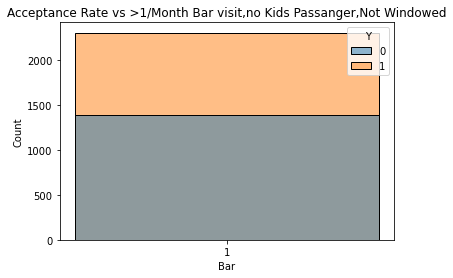

In [502]:
sns.histplot(data=data6, x="Bar", hue="Y").set(title = 'Acceptance Rate vs >1/Month Bar visit,no Kids Passanger,Not Windowed')

In [503]:
#The rejection rate for alcohol consumers that not widowed, no kids and >1 monthly bar visit alot higher than the acceptance rate of the coupons

9.  Based on these observations, what do you hypothesize about passengers who accepted the bar coupons?

In [504]:
'Drivers that are above the age of 25 are more likely to accept coupons, they go to the bar more than 3 times a month.'
'Having passangers in the car means that they are less likely to accept bar coupons'



'Having passangers in the car means that they are less likely to accept bar coupons'

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [505]:
data.sample(5)

destination  passanger weather  temperature  time  \
10719             Work      Alone   Rainy           55   700   
8216   No Urgent Place  Friend(s)   Sunny           55  1000   
4831   No Urgent Place  Friend(s)   Sunny           80  1000   
8549   No Urgent Place    Partner   Rainy           55  1000   
12315             Home      Alone   Sunny           80  1800   

                      coupon expiration  gender     age maritalStatus  ...  \
10719  Carry out & Take away         2h  Female      41        Single  ...   
8216            Coffee House        24h    Male  50plus       Widowed  ...   
4831            Coffee House         2h  Female      21        Single  ...   
8549   Carry out & Take away         2h  Female      36        Dating  ...   
12315  Carry out & Take away         2h  Female      36       Married  ...   

       CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
10719           <1       1~3                  1~3               <1   
8216             0       1~3                   <1               <1   
4831           1~3       4~8                  1~3                0   
8549             0        >8                   >8              1~3   
12315            0       1~3                   <1               <1   

      toCoupon_GEQ5min toCoupon_GEQ15min toCoupon_GEQ25min direction_same  \
10719                1                 1                 0              1   
8216                 1                 1                 0              0   
4831                 1                 1                 0              0   
8549                 1                 0                 0              0   
12315                1                 1                 0              1   

      direction_opp  Y  
10719             0  0  
8216              1  1  
4831              1  0  
8549              1  1  
12315             0  0  

[5 rows x 26 columns]

In [506]:
fig9 = px.histogram(data, x = 'expiration', color= 'Y', title = 'Coupon Experation vs Acceptance rate',color_discrete_map = {0:'Red',1:'Green'})
fig9

In [507]:
'Customers are more likely to accept coupons that are expiring in 2 hours vs 24 hours'

'Customers are more likely to accept coupons that are expiring in 2 hours vs 24 hours'

In [529]:
fig10 = px.histogram(data, x = 'destination',color = 'Y', title = 'Destination vs Acceptance Rate',color_discrete_map = {0:'Teal',1:'Grey'})
fig10

In [ ]:
'Customers are more likely to accept coupons when they are not in a hurry to get somewhere'

In [530]:
fig11 = px.histogram(data, x = 'income',color = 'Y', title = 'Income vs Acceptance rate',color_discrete_map = {0:'Blue',1:'Red'})
fig11

In [ ]:
'Lower income Levels are more likely to accept Coupons'